# Comparing Supervised Learning Performance


Farhanul Fajri

## Context

"We have received a project from Orange Telecom Company where they want to predict what kind of customers are likely to churn, but they are unsure about the specific Machine Learning model that should be used to achieve the best possible predictions. Therefore, we will compare the performance of several machine learning models and determine which model is the most effective."

###### **The dataset is from kaggle.

We can start by load some libraries and analyze the dataset

## Load Libraries

In [1]:
# For data manipulation
import pandas as pd
import numpy as np

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For handing imbalanced data
from imblearn.over_sampling import SMOTE

# For data splitting, transforming and model training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For model evaluation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, roc_auc_score

## Load Dataset

In [2]:
data = pd.read_csv('churn-bigml-80.csv')
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


## Data Preprocessing

### Check & adjust Data Type

In [3]:
# Checking Data Type for every variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

From comparing data.info() and the Dataset, we can deduce the following:
1. We can drop the 'Account length' and 'State' column as it will not affect the prediction.
2. For 'International plan', 'Voice mail plan', 'Churn' column, we need to adjust the Data type. Because the data type is categorical (object) and we need to adjust it to numerical data.

#### Drop 'Account length'

In [4]:
# Drop 'Account length' and 'State' Column
data.drop(['Account length','State'], axis = 1, inplace = True)

#### Encode Categorical (Adjust Data type )

In [5]:
# For 'International plan', 'Voice mail plan', 'Churn', because it's boolean values, we can change the values to 1 and 0
data['Churn'] = [1 if i == True else 0 for i in data['Churn']]
data['International plan'] = [1 if i == 'Yes' else 0 for i in data['International plan']]
data['Voice mail plan'] = [1 if i == 'Yes' else 0 for i in data['Voice mail plan']]

Now the data can be processed by the computer.

### Check & Handle Duplicate

In [6]:
# Checking Duplicate data
data.duplicated().sum()

0

There's no duplication in the dataset

### Check & Handle Missing Values

In [7]:
# Checking missing values
mv_report = pd.DataFrame({})
mv_report['# mv'] = data.isna().sum() # The amount of missing values for every column
mv_report['% mv'] = (data.isna().sum() / len(data))*100 # The amount of missing values for every column (in %)

mv_report.sort_values('# mv', ascending=False)

,# mv,% mv
Area code,0,0.0
International plan,0,0.0
Customer service calls,0,0.0
Total intl charge,0,0.0
Total intl calls,0,0.0
Total intl minutes,0,0.0
Total night charge,0,0.0
Total night calls,0,0.0
Total night minutes,0,0.0
Total eve charge,0,0.0


There's no missing values in the dataset

### Check & Handle Imbalance Data

To predict customer churn, the 'Churn' column should be our target column. It is important to check the values in the 'Churn' column to determine whether they represent balanced or imbalanced classes. If it's not balance, we need to balance it so the machine can increase the prediction performance.

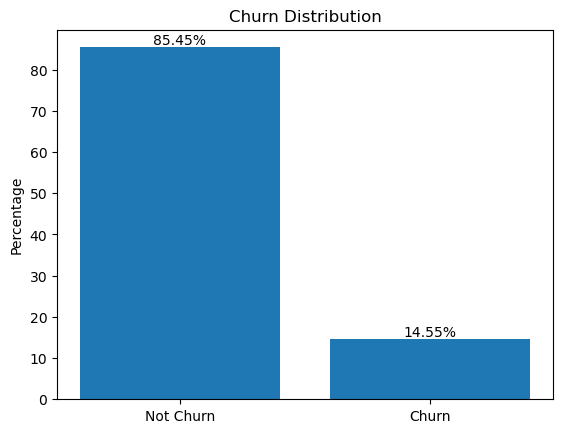

In [8]:
churn_counts = data['Churn'].value_counts()

total_customers = churn_counts.sum()
churn_percent = churn_counts / total_customers * 100

plt.bar(['Not Churn', 'Churn'], churn_percent.values)

# Displaying the percentage above each bar
for i, percent in enumerate(churn_percent.values):
    plt.text(i, percent, f'{percent:.2f}%', ha='center', va='bottom')

plt.ylabel('Percentage')
plt.title('Churn Distribution')
plt.show()


The chart reveals a significant disparity between the churned and non-churned customers, with approximately 14% of the data representing churned customers and 85% representing non-churned customers. Given this imbalance, it is necessary to address it by oversampling the minority class. To achieve this, we will utilize SMOTE (Synthetic Minority Over-sampling Technique), which generates synthetic data by leveraging the characteristics of the nearest neighbors. The imblearn python library provides the necessary tools to implement this technique.

Additionally, it is important to ensure that the machine learning model is not tested on synthetic or artificially generated data. To address this concern, the SMOTE technique is applied exclusively to the training data. To accomplish this, the data is split into training and testing sets using the train_test_split function from scikit-learn. By doing so, the model evaluation will be performed on authentic data, while the training process incorporates synthetic samples to address class imbalance.

Lastly, we need to define the dependent (y) and independent (x) variables. The dependent variable, or the target variable, is 'Churn'. The independent variables consist of all columns except the target variable.

In [9]:
# Splitting the data as X and y
x = data.drop('Churn', axis=1) # all columns except 'churn'
y = data['Churn'] # only churn

# Making a SMOTE object
resampler = SMOTE(random_state=42)

# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

# Resampling the train data
x_resampled, y_resampled = resampler.fit_resample(x_train, y_train)

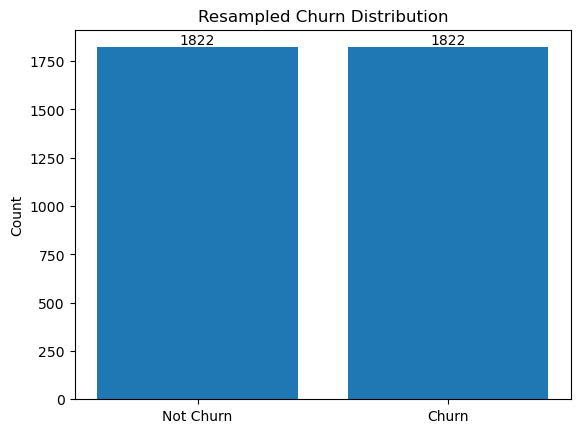

In [10]:
# Checking balanced data
y_resampled_counts = y_resampled.value_counts()

plt.bar(['Not Churn', 'Churn'], y_resampled_counts.values)

# Displaying the number of occurrences above each bar
for i, count in enumerate(y_resampled_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.ylabel('Count')
plt.title('Resampled Churn Distribution')
plt.show()


Now that the data is balanced, it is time to proceed with training the models.

## Training Models

In [11]:
# Making an object for LogisticRegression
model_log = LogisticRegression()

# Fitting the data
model_log.fit(x_resampled, y_resampled)

# Predicting on x_test
y_pred_log = model_log.predict(x_test)

# Making an object for Decision Tree Classifier
model_dt = DecisionTreeClassifier()

# Fitting the data
model_dt.fit(x_resampled, y_resampled)

# Predicting on x_test
y_pred_dt = model_dt.predict(x_test)

# Making an object for Random Forest
model_rf = RandomForestClassifier()

# Fitting the data
model_rf.fit(x_resampled, y_resampled)

# Predicting on x_test
y_pred_rf = model_rf.predict(x_test)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Your code here without displaying the ConvergenceWarning

After training the models, we proceed to evaluate its performance using several metrics, including accuracy, precision, recall, and ROC AUC. To ensure a more robust evaluation, we employ cross-validation, which helps mitigate the impact of data variability and provides more reliable performance estimates.

In [45]:
# Evaluation / Performance model
models = [model_log, model_dt, model_rf]
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'roc_auc': make_scorer(roc_auc_score)
}

cv_scores = []
for model in models:
    scores = cross_validate(model, x_resampled, y_resampled, cv=5, scoring=scoring_metrics)
    cv_scores.append([scores['test_accuracy'].mean(), scores['test_precision'].mean(),
                      scores['test_recall'].mean(), scores['test_roc_auc'].mean()])

compare_cv = pd.DataFrame(cv_scores, columns=['Accuracy', 'Precision', 'Recall', 'ROC AUC'])
compare_cv['Model Name'] = ['LR', 'DT', 'RF']
compare_cv = compare_cv[['Model Name', 'Accuracy', 'Precision', 'Recall', 'ROC AUC']]

In [46]:
compare_cv.sort_values('Accuracy', ascending=False)

,Model Name,Accuracy,Precision,Recall,ROC AUC
2,RF,0.933861,0.948195,0.917649,0.933855
1,DT,0.861139,0.846545,0.882526,0.861136
0,LR,0.689071,0.679571,0.715118,0.689062


Based on the comparing report above, it is evident that using Random Forest model is the best way to achieves a satisfactory score in predicting customer churn, which is great.

Lastly, let's make Confusion Matrix.

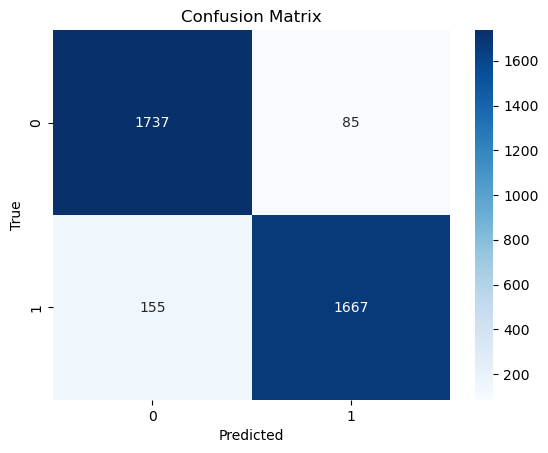

In [39]:
# Confusion Matrix

# Define your model
model = RandomForestClassifier()

# Perform cross-validated predictions on the training data
cross_val_predictions = cross_val_predict(model, x_resampled, y_resampled, cv=5)

# Compute the confusion matrix
cm = confusion_matrix(y_resampled, cross_val_predictions)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

Across multiple runs, out of 1822 churned customer samples, an average of 1667 samples were correctly classified, while 155 samples were misclassified.

## Conclusion

Based on the comparison report, it is evident that using the Random Forest model is the most effective approach to achieve a satisfactory score in predicting customer churn. Our treatment and model provide a high level of confidence, with a 93% accuracy in predicting customer churn correctly. Additionally, out of all the customers predicted to churn, 94% of them are indeed churned (True Positive), while the remaining 6% are not actually churned (False Positive).